In [26]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Monte Carlo Simulation

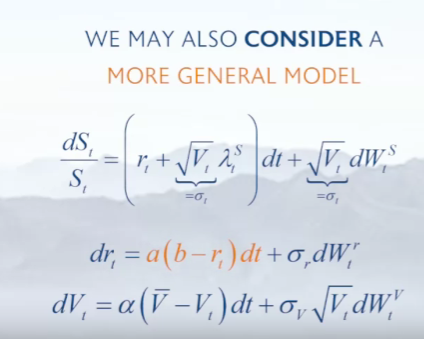

Assuming a mean-reverting model for interest rates, what happens when the current interest rate value is below the long-term mean value?

When interest rate is below its long-term mean value, it tends to go back up to the long-term mean value on average, with an intensity which is proportional to the speed of mean-reversion.

Question
Assuming a mean-reverting model for interest rates with long-term mean level equal to 2%. If the current level of interest rate is 3% and if the speed of mean reversion is 0.5, what is the average annual expected change in interest rate?

A: The expected change in interest rate is given by 0.5x(1%-2%)=-0.5%.     

# Lab Session-Random Walks and Monte Carlo

Recall that the stochastic model for asset returns is given by the Geometric Brownian Motion process:

$$ \frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t $$

In [27]:
import numpy as np
import pandas as pd

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    #delta time
    dt= 1/steps_per_year
    n_steps= int(n_years*steps_per_year)
    # Psi is the random
    xi=np.random.normal(size=(n_steps, n_scenarios))
    rets=mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices= s_0*(1+rets).cumprod()
    return prices

In [28]:
p=gbm(10,n_scenarios=3)

In [29]:
p.shape

(120, 3)

In [30]:
p.head()

,0,1,2
0,100.633373,103.196345,98.666585
1,101.027968,102.695461,93.035991
2,98.711784,109.696652,95.576256
3,100.579872,106.454600,89.811605
4,95.943545,108.642054,90.572346


<Axes: >

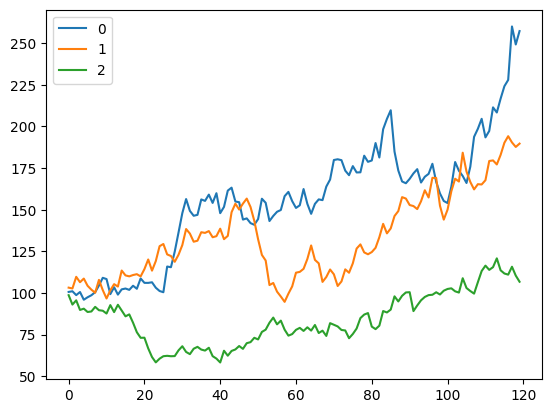

In [31]:
p.plot()

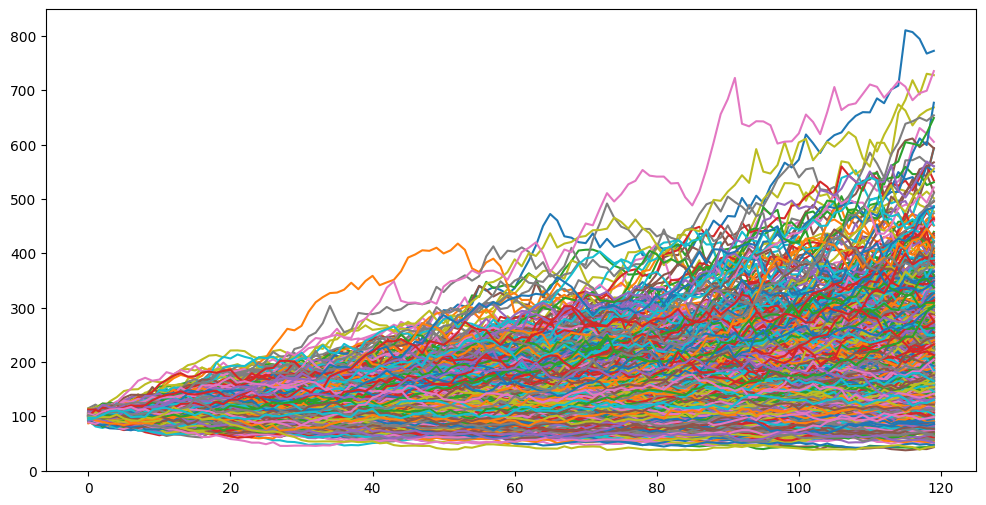

In [32]:
p=gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [33]:
import numpy as np
import pandas as pd

def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    #delta time
    dt= 1/steps_per_year
    n_steps= int(n_years*steps_per_year)
    # Psi is the random
    xi=np.random.normal(size=(n_steps, n_scenarios))
    rets=mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices= s_0*(1+rets).cumprod()
    return prices


#rewrite the above model, be more efficient, avoiding loops in model.
def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    #delta time
    dt= 1/steps_per_year
    n_steps= int(n_years*steps_per_year)
    # Psi is the random
    rets_plus_1=np.random.normal(loc=(mu*dt) ,scale=(sigma*np.sqrt(dt)) ,size=(n_steps, n_scenarios))
    # to prices
    prices= s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [34]:
%timeit gbm(n_years=5, n_scenarios=100)

1.63 ms ± 192 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%timeit gbm1(n_years=5, n_scenarios=100)

1.42 ms ± 36.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<Axes: >

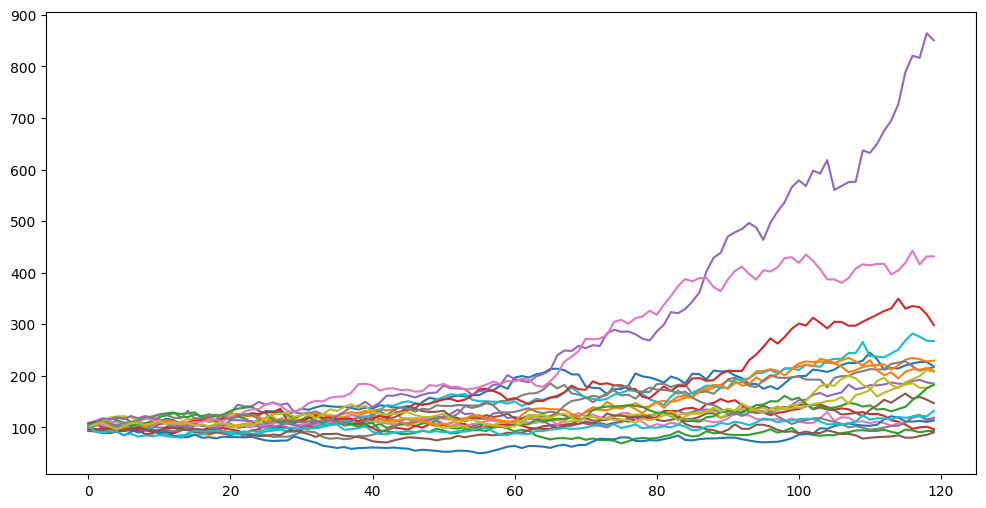

In [36]:
gbm(n_years=10, n_scenarios=20).plot(legend=False,figsize=(12,6))

In [37]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    #delta time
    dt= 1/steps_per_year
    n_steps= int(n_years*steps_per_year)
    # Psi is the random
    rets_plus_1=np.random.normal(loc=(mu*dt) ,scale=(sigma*np.sqrt(dt)) ,size=(n_steps, n_scenarios))
    rets_plus_1[0]=1
    # to prices
    prices= s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [38]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,-2.966984,-5.834529,3.432357,-1.270660,5.372952,-4.390682,4.910682,-0.069994,2.823733,-5.365503
2,-0.095521,0.098606,-0.047347,-0.013699,-0.653056,0.208619,-0.201346,-0.001776,-0.048995,0.349873
3,-0.006002,0.005318,0.001525,0.000454,-0.010648,0.004765,-0.008935,-0.000125,-0.000838,-0.006320
4,-0.000354,-0.000184,-0.000056,-0.000014,-0.000754,0.000151,-0.000160,-0.000004,-0.000046,-0.000132


#Analyzing CPPI strategies

u(mu) parameter: can impact the drift of the trend
sigma parameter: volatility of each scenario could be large, expanding the possible outcomes.


# Lab Session-Installing IPYWIDGETS


In [39]:
#Download and install nodejs from https://nodejs.org/en/
# intall ipywidgets: pip install ipywidgets
import ipywidgets as widgets

In [40]:
def squareit(n):
    return n*n

In [41]:
squareit(5)

25

In [42]:
widgets.interact(squareit, n=(0,100))

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.squareit(n)>

Designing and calibrating CPPI strategies

Even the volatility may high, but if rebalance more frequently (e.g. once a week) enough, it might still be all right.


If the markets are very volatile, you probably want to use a small m. If the markets are very calm, you probably want to use a large m.

# Lab session - interactive plots of monte Carlo Simulations of CPPI and GBM-Part1

In [43]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Axes: >

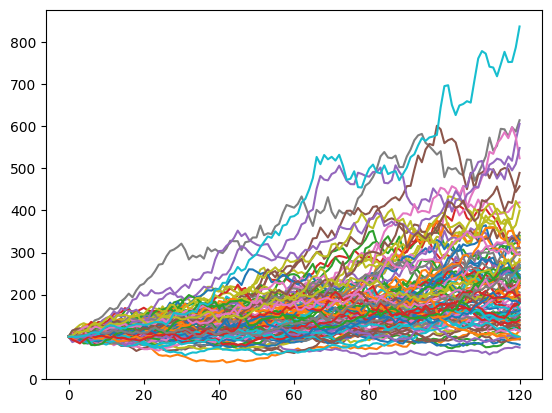

In [44]:
# GBM interactive Plots

erk.gbm(10,100, mu=0.1).plot(legend=False)

In [45]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under a Geometric Brownian Motion model
    """
    s_0=100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha = 0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=s_0, ls=":", color="black")
    ax.set_ylim(top=400)
    # draw a dot at the origin
    ax.plot(0,s_0, marker='o',color='darkred', alpha=0.2)


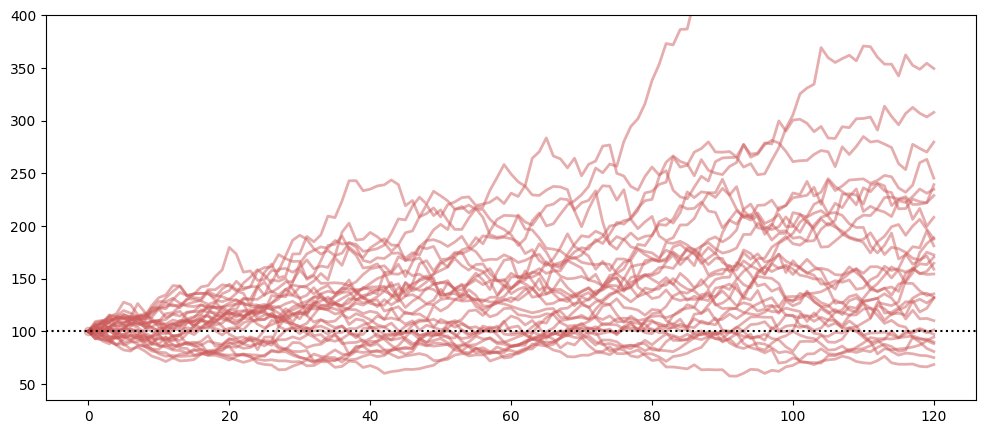

In [46]:
show_gbm(30,0.07,0.15)

In [47]:
gbm_controls = widgets.interactive(show_gbm, 
                                   n_scenarios=(1, 20, 1), #1 to 20 and the step is 5
                                   mu=(-0.2,0.2,0.01), #0 to 0.2 and the step is 0.01
                                   sigma=(0,0.3,0.01))

In [48]:
display(gbm_controls)
# when change the n_scenarios it will redraw the graph again

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

In [59]:
# Interactive CPPI Simulation - Monte Carlo

def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    y_max=wealth.values.max()*y_max/100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12, 6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start*floor, ls="--", color="red")
    ax.set_ylim(top=y_max)

cppi_controls = widgets.interactive(show_cppi, 
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0., +.2, .01),
                                   sigma=(0, .30, .05),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

Lab session - interactive plots of monte Carlo Simulations of CPPI and GBM-Part2

In [61]:
import matplotlib as plt

In [65]:
import matplotlib.pyplot as plt
import numpy as np

def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, steps_per_year=12, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    #get more understanding about the importance of correlations and how parameters impact the efficient frontiers
    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=steps_per_year)
    risky_r = pd.DataFrame(sim_rets)
    # run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r),riskfree_rate=riskfree_rate,m=m, start=start, floor=floor)
    wealth = btr["Wealth"]

    # calculate terminal wealth stats
    y_max=wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)
    n_failures = failure_mask.sum() #sum all the true, it will the number of failure
    p_fail = n_failures/n_scenarios

    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0

    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[3,2]}, figsize=(25, 9))
    plt.subplots_adjust(wspace=0.0)
    
    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color="indianred")
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start*floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
    
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.7, .9),xycoords='axes fraction', fontsize=23)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(.7, .85),xycoords='axes fraction', fontsize=23)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(.7, .7), xycoords='axes fraction', fontsize=23)

cppi_controls = widgets.interactive(show_cppi,
                                   n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), 
                                   mu=(0., +.2, .01),
                                   sigma=(0, .3, .05),
                                   floor=(0, 2, .1),
                                   m=(1, 5, .5),
                                   riskfree_rate=(0, .05, .01),
                                   steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12,
                                                          description="Rebals/Year"),
                                   y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                          description="Zoom Y Axis")
)
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

Consider the Monte Carlo Simulation we ran for CPPI. Assume there is no floor set (i.e. Floor is set to
 Zero) As you increase the number of scenarios, which of the following would you expect:

A: The difference in terminal wealth between the Worst Scenario and the Best Scenario will INCREASE

Question 2
As you increase the FLOOR, the WORST CASE scenario will:

A: INCREASE

Assume a non-zero floor that is less than the starting wealth. As you increase mu and keep other
 parameters fixed, you would expect that the terminal wealth:

A: INCREASES

Question 4
All other things being equal, which of these changes will cause an INCREASE in floor violations

A: Increasing both “m” and “sigma”

All other things being equal, which of these changes will cause an INCREASE in floor violations

A: Increasing “m” but decreasing “rebals per year”

Question 6
All other things being equal, which of these changes will cause in INCREASE in Expected Shortfall

A: Increasing “m” but decreasing “rebals per year”

Parameter changes that increase the probability of floor violations will also tend to increase the Expected
 Shortfall. This statement is:

A: True

Not correct

A CPPI Based Principal Protection Strategy aims to return at least the invested principal by setting the floor
 equal to the initial value of the assets. Which of the following is true:

 A(wrong): It is only possible to run a CPPI based Principal Protection Strategy strategy if mu is greater than or equal
 to 0

 A: It is only possible to run a CPPI based Principal Protection Strategy if the risk free rate is greater than or
 equal to 0

Not correct

A CPPI based Principal Protection Strategy with 12 rebals per year can have a zero expected shortfall only
 if:

A(wrong): m is strictly greater than 1

A: m=1

Question 10
All other things being equal, A CPPI based Principal Protection Strategy is more likely to have a final negative return if: 

A: sigma increases